# **Importing Libraries**




In [14]:
import tensorflow as tf
import os,glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  


# **Load Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Brain_tumor"

In [4]:
%cd /content/gdrive/MyDrive/Brain_tumor

/content/gdrive/MyDrive/Brain_tumor


# **Visualization of the images**

In [33]:
os.chdir('/content/gdrive/MyDrive/Brain_tumor/Test/no')
N = []
Y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      N.append(img)
      
os.chdir('/content/gdrive/MyDrive/Brain_tumor/Test/yes')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      Y.append(img)


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

Non-Tumor:-
-----------------


<Figure size 720x720 with 0 Axes>

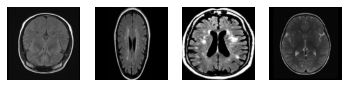

Tumor:-
-----------------


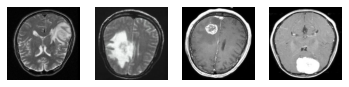

In [43]:
plt.figure(figsize=(10, 10))
plt.subplots(2, 4)
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(N[i], cmap="gray")
    plt.axis('off')
print("Non-Tumor:-")
print("-----------------")
plt.show()
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(Y[i], cmap="gray")
    plt.axis('off')
print("Tumor:-")
print("-----------------")
plt.show()

# ***VGG16 model for image classification***
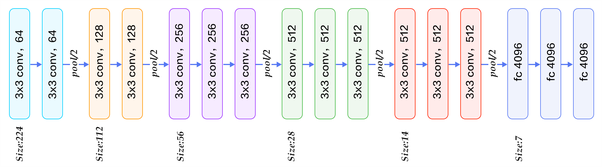


In [ ]:
# Important parameters
batch_size = 60
width_shape = 224
height_shape = 224
class_names = ['no','yes']

In [ ]:
# An alternative to copy the VGG16 model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential, Model

image_input = Input(shape=(224,224,3))
model2 = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

# Take the last layer (block5_pool), and from there build the desnse layers
last_layer = model2.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
#x = Dense(4096, activation='relu', name='fc1')(x)
#x = Dense(4096, activation='relu', name='fc2')(x)

out = Dense(2, activation='softmax', name='output')(x)

model2 = Model(image_input, out)

model2.summary()

553476096/553467096 [==============================] - 12s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

# **Daset Preparation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications.imagenet_utils import preprocess_input
# Definimos las direcciones del dataset
train_data_dir = "/content/gdrive/MyDrive/Brain_tumor/Train"

test_data_dir = "/content/gdrive/MyDrive/Brain_tumor/Test"

# Definimos un ImageDataGenerator para cada conjunto de imagenes
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    shuffle=False)



test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size, 
    shuffle=False)

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


# **Model build parameters (loss, optimizer and metrics)**

In [ ]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# **Model Training**

In [ ]:

from tensorflow.keras.callbacks import TensorBoard
import datetime

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)

In [ ]:
n_steps = train_generator.samples // batch_size
n_val_steps = test_generator.samples // batch_size
n_epochs = 20
n_steps,n_val_steps

(20, 5)

In [ ]:
model_history = model2.fit(  
    train_generator,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_data=test_generator,
    steps_per_epoch=n_steps,
    validation_steps=n_val_steps)

Epoch 1/20
20/20 [==============================] - 57s 2s/step - loss: 34.6910 - accuracy: 0.3490 - val_loss: 0.6807 - val_accuracy: 0.6000
Epoch 2/20
20/20 [==============================] - 3s 167ms/step - loss: 0.8511 - accuracy: 0.5938 - val_loss: 0.6807 - val_accuracy: 0.6000
Epoch 3/20
20/20 [==============================] - 3s 167ms/step - loss: 0.6895 - accuracy: 0.5885 - val_loss: 0.6804 - val_accuracy: 0.6000
Epoch 4/20
20/20 [==============================] - 3s 167ms/step - loss: 0.6682 - accuracy: 0.6458 - val_loss: 0.6680 - val_accuracy: 0.6000
Epoch 5/20
20/20 [==============================] - 3s 166ms/step - loss: 0.7270 - accuracy: 0.5938 - val_loss: 0.6811 - val_accuracy: 0.6400
Epoch 6/20
20/20 [==============================] - 3s 167ms/step - loss: 0.7022 - accuracy: 0.5938 - val_loss: 0.6760 - val_accuracy: 0.6600
Epoch 7/20
20/20 [==============================] - 3s 168ms/step - loss: 0.6793 - accuracy: 0.6458 - val_loss: 0.6541 - val_accuracy: 0.6000
Epoch 8

# **CNN Model for image classification (Transfer Learning and Data Augmentation)**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Definimos las direcciones del dataset
train_data_dir = "/content/gdrive/MyDrive/Brain_tumor/Train"

test_data_dir = "/content/gdrive/MyDrive/Brain_tumor/Test"

# Definimos la configuración de data-augmentation para los datos de entrenamiento
train_datagen = ImageDataGenerator(  
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)


test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='/content/WorkShopIC',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size, 
    shuffle=False)



Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


#  **Transfer Learning**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential, Model

# Tomamos el modelo VGG16, modificamos sus capas densas
image_input = Input(shape=(224,224,3))
model2 = VGG16(input_tensor=image_input, include_top=False,weights='imagenet')

last_layer = model2.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(256, activation='relu',kernel_initializer="he_uniform", name='fc1')(x)
x = Dense(128, activation='relu',kernel_initializer="he_uniform", name='fc2')(x)
x = Dropout(0.5)(x)
out = Dense(2, activation='softmax', name='output')(x)

model2 = Model(image_input, out)

# Definimos las capas a entrenar
for layer in model2.layers[:-4]:
	layer.trainable = False

model2.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# Compilamos el modelo, definimos función loss y optimizador
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# **Training**

In [ ]:
n_steps = train_generator.samples // batch_size
n_val_steps = test_generator.samples // batch_size
n_epochs = 20
n_steps,n_val_steps

(40, 10)

In [ ]:
model_history = model2.fit(  
    train_generator,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_data=test_generator,
    steps_per_epoch=n_steps,
    validation_steps=n_val_steps)

Epoch 1/20
40/40 [==============================] - 1349s 33s/step - loss: 15.9390 - accuracy: 0.5658 - val_loss: 5.4254 - val_accuracy: 0.6717
Epoch 2/20
40/40 [==============================] - 36s 908ms/step - loss: 3.0468 - accuracy: 0.7971 - val_loss: 1.5278 - val_accuracy: 0.8250
Epoch 3/20
40/40 [==============================] - 38s 937ms/step - loss: 0.6654 - accuracy: 0.8737 - val_loss: 0.8318 - val_accuracy: 0.8550
Epoch 4/20
40/40 [==============================] - 36s 909ms/step - loss: 0.2655 - accuracy: 0.9117 - val_loss: 0.5712 - val_accuracy: 0.8317
Epoch 5/20
40/40 [==============================] - 37s 911ms/step - loss: 0.2207 - accuracy: 0.9171 - val_loss: 0.5004 - val_accuracy: 0.8583
Epoch 6/20
40/40 [==============================] - 37s 914ms/step - loss: 0.2005 - accuracy: 0.9279 - val_loss: 0.2407 - val_accuracy: 0.9150
Epoch 7/20
40/40 [==============================] - 38s 938ms/step - loss: 0.1850 - accuracy: 0.9287 - val_loss: 0.3674 - val_accuracy: 0.878

#  **Test the model**

In [ ]:
# Tomamos una imagen de test y probamos el modelo
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import cv2 
import numpy as np

imaget_path = "/content/drive/MyDrive/Brain_tumor/Test/no/No12.jpgv"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = model2.predict(xt)

print(class_names[np.argmax(preds)])
print(preds)
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
print(class_names[np.argmax(preds)])

no


# **Save the model**

In [ ]:
from keras.models import load_model 
model2.save("Brain_tumor.h5") 